# Machine Learning Model needed to predict Daily Individual Basketball Players game stats and their team score outcome on a daily basis

## PyCaret

This is a free-use library that allows automating many machine learning processes.

In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 14.5MB/s 
     |████████████████████████████████| 66.3MB 48kB/s 
     |████████████████████████████████| 276kB 57.9MB/s 
     |████████████████████████████████| 102kB 14.3MB/s 
     |████████████████████████████████| 13.9MB 254kB/s 
     |████████████████████████████████| 1.8MB 49.1MB/s 
     |████████████████████████████████| 266kB 57.1MB/s 
     |████████████████████████████████| 1.6MB 55.1MB/s 
     |████████████████████████████████| 6.8MB 40.0MB/s 
     |████████████████████████████████| 174kB 59.2MB/s 
     |████████████████████████████████| 148.9MB 85kB/s 
     |████████████████████████████████| 2.1MB 42.6MB/s 
     |████████████████████████████████| 337kB 54.6MB/s 
     |████████████████████████████████| 81kB 12.0MB/s 
     |████████████████████████████████| 1.1MB 52.6MB/s 
     |████████████████████████████████| 163kB 43.7MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 153kB 57.8MB

# Import data



here please click on the button and upload the file "NBA_GAME_143.xlsx"

In [2]:
from google.colab import files
files.upload()

Saving NBA_GAME_143.xlsx to NBA_GAME_143.xlsx


# Libraries


In [4]:
# basic libraries
import pandas as pd
import numpy as np

# pycaret utils
from pycaret.regression import * 
from pycaret.utils import enable_colab 

## Processing Data

### Rename and drop columns

In [5]:
df=pd.read_excel('NBA_GAME_143.xlsx')
df=df.rename(columns={'PLAYER \nFULL NAME':'PLAYER-NAME'})
df=df.drop(['DATASET','DATE','GAME-STATE','GAMEID','POSITION','PLAYER-ID','OWN','OPPONENT \nTEAM','PLAYER-NAME'],axis=1)
df.dropna()
df.head()
len(df)

107646

In [6]:
print("Total of samples in dataset:",df.shape[0])

Total of samples in dataset: 107646


### Dataset division 
Df_1 to Drafkings
Df_2 to Fanduel

In [7]:
df_1=df.drop(['SCORED_F.1','SALARY_F.1','POSITION_F'],axis=1)
df_2=df.drop(['SCORED_DK.1','SALARY_DK','POSITION_DK.1'],axis=1)

#### Drop NAN or Null data

In [8]:
df_1.dropna(how='any',inplace=True)
df_2.dropna(how='any',inplace=True)

### PyCaret Data preporcessing


In [9]:
reg1 = setup(data = df_1, target = 'SCORED_DK.1',numeric_features=['3P','OR','PF','ST','TO','BL','DAYS\nREST']) 

,Description,Value
0,session_id,8381
1,Target,SCORED_DK.1
2,Original Data,"(104233, 23)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(72963, 32)"


# Draft Kings Regresion models - Comparision

In [10]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,7.360000e-02,4.640000e-02,2.145000e-01,9.998000e-01,0.0119,4.700000e-03,11.579
ridge,Ridge Regression,2.520000e-01,1.727000e-01,4.153000e-01,9.992000e-01,0.0312,1.730000e-02,0.039
lr,Linear Regression,2.521000e-01,1.727000e-01,4.154000e-01,9.992000e-01,0.0312,1.730000e-02,0.291
br,Bayesian Ridge,2.520000e-01,1.727000e-01,4.153000e-01,9.992000e-01,0.0312,1.730000e-02,0.130
xgboost,Extreme Gradient Boosting,4.850000e-01,5.224000e-01,7.225000e-01,9.975000e-01,0.0355,2.880000e-02,9.139
gbr,Gradient Boosting Regressor,7.544000e-01,1.107000e+00,1.051700e+00,9.947000e-01,0.0729,5.730000e-02,10.765
et,Extra Trees Regressor,6.370000e-01,1.282200e+00,1.131700e+00,9.939000e-01,0.0392,2.710000e-02,27.045
par,Passive Aggressive Regressor,8.140000e-01,1.385500e+00,1.050200e+00,9.934000e-01,0.0787,6.260000e-02,6.317
rf,Random Forest Regressor,6.650000e-01,1.380100e+00,1.174100e+00,9.934000e-01,0.0406,2.750000e-02,37.382
en,Elastic Net,1.333400e+00,3.252900e+00,1.803400e+00,9.844000e-01,0.1160,1.039000e-01,0.068


## Selection of the best 4 models (Draft Kings)

You can see above that the best models were:


1.   CATBOOST
2.   RIDGE REGRESSION
3.   LINEAR REGRESSION
4.   BAYESIAN RIDGE



In [17]:
def read_data_1(model):
  l=np.zeros((1, 32))
  print("Please enter your player information")
  print("Minutes")
  l[0][0]=input()
  print("Field Goals Made")
  l[0][1]=input()
  print("Field Goals Attempted")
  l[0][2]=input()
  print("Three Point Field Goals Made")
  l[0][3]=input()
  print("Three Point Field Goals Attempted")
  l[0][4]=input()
  print("Free Throws Made")
  l[0][5]=input()
  print("Free Throws Attempted")
  l[0][6]=input()
  print("Offensive Rebounds")
  l[0][7]=input()
  print("Defensive Rebounds")
  l[0][8]=input()
  print("Total Rebounds")
  l[0][9]=input()
  print("Assists")
  l[0][10]=input()
  print("Personal Fouls")
  l[0][11]=input()
  print("Steals")
  l[0][12]=input()
  print("Turnovers")
  l[0][13]=input()
  print("Blocks")
  l[0][14]=input()
  print("Points")
  l[0][15]=input()
  print("Usage rate a.k.a. Usage Percentage")
  l[0][16]=input()
  print("Player's individual days rested")
  l[0][17]=input()
  print("Salary")
  l[0][18]=input()
  print("Venue of the game for the player")
  print(" ")
  print("press 1 for Road or 0 for Home")
  l[0][19]=input()
  print("the player has started or not")
  print(" ")
  print("press 0 for yes or 1 for no")
  l[0][20]=input()
  print("write the digit related to your player's position")
  print("1-Center")
  print(" ")
  print("2-Center/Power Forward")
  print(" ")
  print("3-Power Forward")
  print(" ")
  print("4-Power Forward/Center")
  print(" ")
  print("5-Point Guard")
  print(" ")
  print("6-Point Guard/Small Forward")
  print(" ")
  print("7-Point Guard/Shooting Guard")
  print(" ")
  print("8-Small Forward")
  print(" ")
  print("9-Small Forward/Power Forward")
  print(" ")
  print("10-Shooting Guard")
  print(" ")
  print("11-Shooting Guard/Small Forward")
  print(" ")
  k=input()
  if k==1:
    l[0][21]=1
  if k==2:
    l[0][22]=1
  if k==3:
    l[0][23]=1
  if k==4:
    l[0][24]=1
  if k==5:
    l[0][25]=1
  if k==6:
    l[0][26]=1
  if k==7:
    l[0][27]=1
  if k==8:
    l[0][28]=1
  if k==9:
    l[0][29]=1
  if k==10:
    l[0][30]=1
  if k==11:
    l[0][31]=1
  print("Play smart with Transcender Global")
  print(" ")
  print("Your player's score in DF is:")

  return model.predict(l)[0]  

### Test CATBOOST model 

let's see the firts one CATBOOST


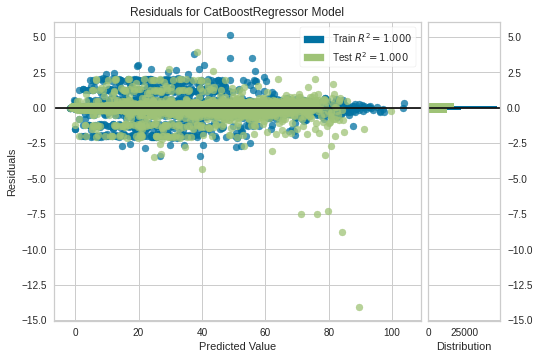

In [11]:
catb = create_model('catboost', fold = 5)
plot_model(catb)

In [18]:
read_data_1(catb)

Please enter your player information
Minutes
1
Field Goals Made
1
Field Goals Attempted
1
Three Point Field Goals Made
1
Three Point Field Goals Attempted
1
Free Throws Made
1
Free Throws Attempted
1
Offensive Rebounds
1
Defensive Rebounds
1
Total Rebounds
1
Assists
1
Personal Fouls
1
Steals
1
Turnovers
1
Blocks
1
Points
1
Usage rate a.k.a. Usage Percentage
1
Player's individual days rested
1
Salary
1000
Venue of the game for the player
 
press 1 for Road or 0 for Home
1
the player has started or not
 
press 0 for yes or 1 for no
1
write the digit related to your player's position
1-Center
 
2-Center/Power Forward
 
3-Power Forward
 
4-Power Forward/Center
 
5-Point Guard
 
6-Point Guard/Small Forward
 
7-Point Guard/Shooting Guard
 
8-Small Forward
 
9-Small Forward/Power Forward
 
10-Shooting Guard
 
11-Shooting Guard/Small Forward
 
5
Play smart with Transcender Global
 
Your player's score in DF is:


8.278960672937654

### Test Ridge Regression Model


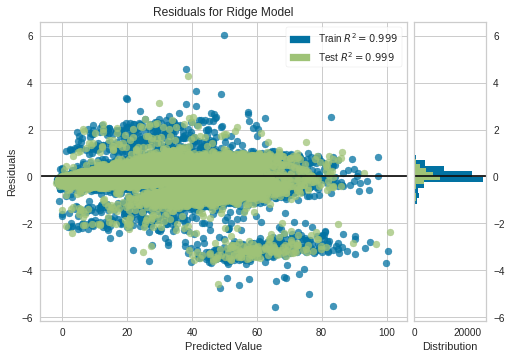

In [19]:
rr = create_model('ridge', fold = 5)
plot_model(rr)

In [20]:
read_data_1(rr)

Please enter your player information
Minutes
1
Field Goals Made
1
Field Goals Attempted
1
Three Point Field Goals Made
1
Three Point Field Goals Attempted
1
Free Throws Made
1
Free Throws Attempted
1
Offensive Rebounds
1
Defensive Rebounds
1
Total Rebounds
1
Assists
1
Personal Fouls
1
Steals
1
Turnovers
1
Blocks
1
Points
1
Usage rate a.k.a. Usage Percentage
1
Player's individual days rested
20
Salary
1000
Venue of the game for the player
 
press 1 for Road or 0 for Home
1
the player has started or not
 
press 0 for yes or 1 for no
1
write the digit related to your player's position
1-Center
 
2-Center/Power Forward
 
3-Power Forward
 
4-Power Forward/Center
 
5-Point Guard
 
6-Point Guard/Small Forward
 
7-Point Guard/Shooting Guard
 
8-Small Forward
 
9-Small Forward/Power Forward
 
10-Shooting Guard
 
11-Shooting Guard/Small Forward
 
2
Play smart with Transcender Global
 
Your player's score in DF is:


10.496648087981157

### Test Linear Regression Model

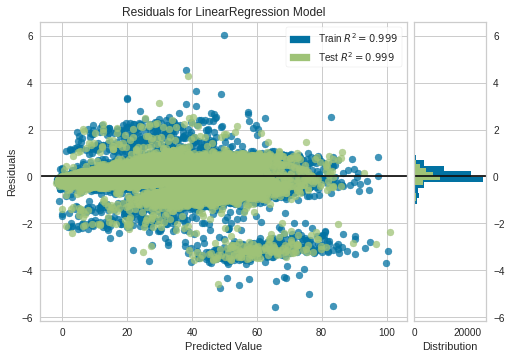

In [21]:
lr = create_model('lr', fold = 5)
plot_model(lr)

In [22]:
read_data_1(lr)


Please enter your player information
Minutes
1
Field Goals Made
1
Field Goals Attempted
1
Three Point Field Goals Made
1
Three Point Field Goals Attempted
1
Free Throws Made
1
Free Throws Attempted
1
Offensive Rebounds
1
Defensive Rebounds
1
Total Rebounds
1
Assists
1
Personal Fouls
1
Steals
1
Turnovers
1
Blocks
1
Points
1
Usage rate a.k.a. Usage Percentage
1
Player's individual days rested
1
Salary
200
Venue of the game for the player
 
press 1 for Road or 0 for Home
1
the player has started or not
 
press 0 for yes or 1 for no
0
write the digit related to your player's position
1-Center
 
2-Center/Power Forward
 
3-Power Forward
 
4-Power Forward/Center
 
5-Point Guard
 
6-Point Guard/Small Forward
 
7-Point Guard/Shooting Guard
 
8-Small Forward
 
9-Small Forward/Power Forward
 
10-Shooting Guard
 
11-Shooting Guard/Small Forward
 
2
Play smart with Transcender Global
 
Your player's score in DF is:


8.331814291101182

### Test Bayessian Ridge

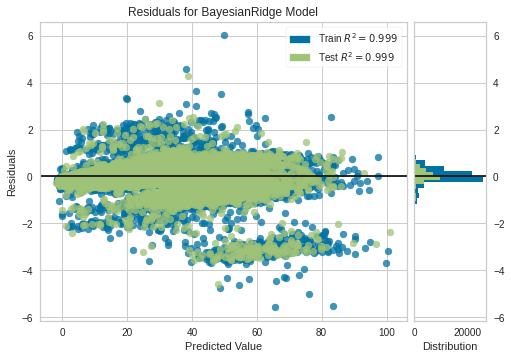

In [24]:
br = create_model('br', fold = 5)
plot_model(br)

Test your model (Bayesian Ridge)

In [25]:
read_data_1(br)

Please enter your player information
Minutes
1
Field Goals Made
1
Field Goals Attempted
1
Three Point Field Goals Made
1
Three Point Field Goals Attempted
1
Free Throws Made
1
Free Throws Attempted
1
Offensive Rebounds
1
Defensive Rebounds
1
Total Rebounds
1
Assists
1
Personal Fouls
1
Steals
1
Turnovers
1
Blocks
1
Points
1
Usage rate a.k.a. Usage Percentage
1
Player's individual days rested
1
Salary
200
Venue of the game for the player
 
press 1 for Road or 0 for Home
0
the player has started or not
 
press 0 for yes or 1 for no
1
write the digit related to your player's position
1-Center
 
2-Center/Power Forward
 
3-Power Forward
 
4-Power Forward/Center
 
5-Point Guard
 
6-Point Guard/Small Forward
 
7-Point Guard/Shooting Guard
 
8-Small Forward
 
9-Small Forward/Power Forward
 
10-Shooting Guard
 
11-Shooting Guard/Small Forward
 
2
Play smart with Transcender Global
 
Your player's score in DF is:


8.362100137945612

# FanDuel Regression Models - Comparision

In [26]:
reg2 = setup(data = df_2, target = 'SCORED_F.1',numeric_features=['3P','OR','PF','ST','TO','BL','DAYS\nREST'])

,Description,Value
0,session_id,517
1,Target,SCORED_F.1
2,Original Data,"(105641, 23)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(73948, 28)"


In [27]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,4.543000e-01,5.972000e-01,7.727000e-01,9.970000e-01,0.0372,2.610000e-02,10.902
ridge,Ridge Regression,4.717000e-01,6.140000e-01,7.835000e-01,9.969000e-01,0.0383,2.650000e-02,0.036
lr,Linear Regression,4.717000e-01,6.140000e-01,7.835000e-01,9.969000e-01,0.0383,2.650000e-02,0.048
br,Bayesian Ridge,4.717000e-01,6.140000e-01,7.835000e-01,9.969000e-01,0.0383,2.650000e-02,0.104
xgboost,Extreme Gradient Boosting,7.377000e-01,1.251400e+00,1.118500e+00,9.937000e-01,0.0544,4.570000e-02,7.980
gbr,Gradient Boosting Regressor,9.817000e-01,1.852500e+00,1.360800e+00,9.907000e-01,0.0884,7.280000e-02,9.808
et,Extra Trees Regressor,8.720000e-01,2.173700e+00,1.473800e+00,9.891000e-01,0.0612,4.340000e-02,23.867
rf,Random Forest Regressor,8.763000e-01,2.279500e+00,1.509400e+00,9.886000e-01,0.0612,4.270000e-02,34.206
par,Passive Aggressive Regressor,1.352000e+00,3.261400e+00,1.765600e+00,9.837000e-01,0.1339,1.167000e-01,4.422
lasso,Lasso Regression,1.579800e+00,4.666300e+00,2.159800e+00,9.766000e-01,0.1569,1.499000e-01,0.059


## Selection of the best 4 models (FanDuel)

### Test Catboost Model


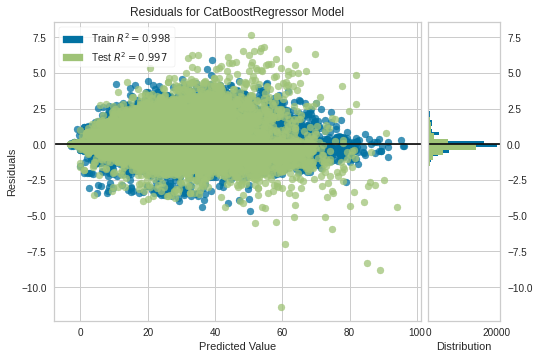

In [28]:
catb = create_model('catboost', fold = 5)
plot_model(catb)

In [ ]:
read_data_1(catb)

### Test Ridge Regression Model

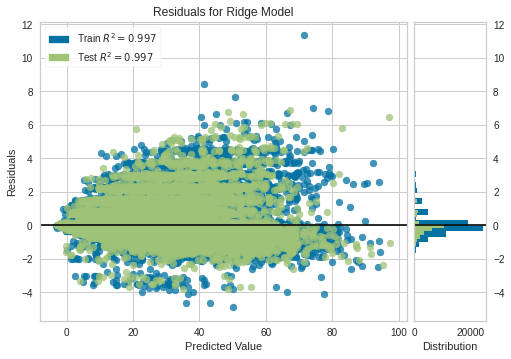

In [29]:
rr = create_model('ridge', fold = 5)
plot_model(rr)

In [ ]:
read_data_1(rr)

### Test Linear regression Model

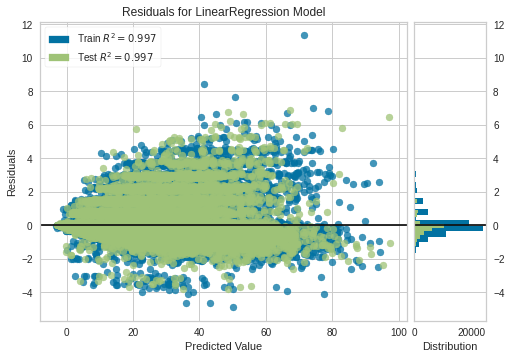

In [30]:
lr = create_model('lr', fold = 5)
plot_model(lr)

In [ ]:
read_data_1(lr)

### Test Bayessian Ridge Model

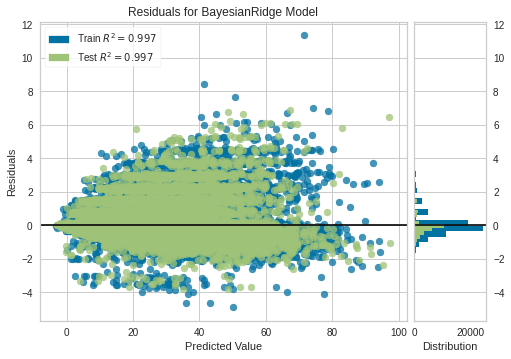

In [31]:
br = create_model('br', fold = 5)
plot_model(br)

In [ ]:
read_data_1(br)